## Load Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
sales = pd.read_csv('Philadelphia_Crime_Rate_noNA.csv')
sales.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


## Exploratory Analysis 

<AxesSubplot:xlabel='CrimeRate', ylabel='HousePrice'>

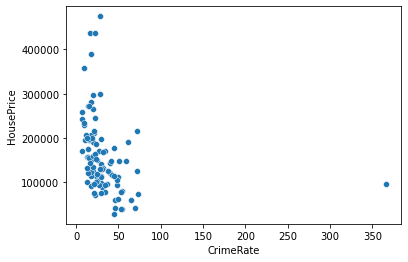

In [3]:
sns.scatterplot(data = sales, x = 'CrimeRate', y = 'HousePrice')

<AxesSubplot:xlabel='CrimeRate', ylabel='HousePrice'>

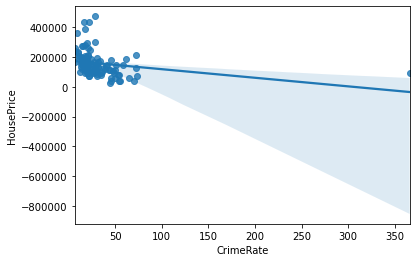

In [4]:
sns.regplot(data = sales, x = 'CrimeRate', y = 'HousePrice')

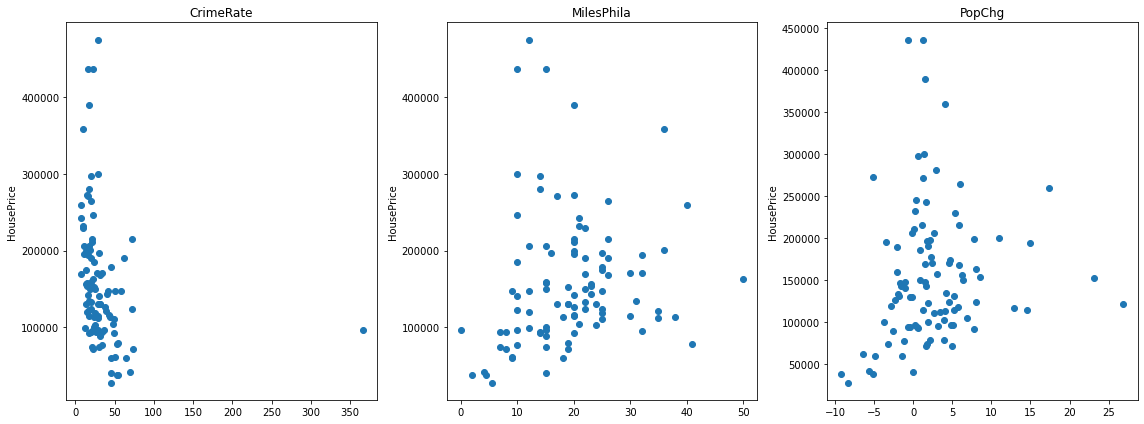

In [5]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,6))

axes[0].plot(sales['CrimeRate'], sales['HousePrice'],'o')
axes[0].set_ylabel('HousePrice')
axes[0].set_title('CrimeRate')

axes[1].plot(sales['MilesPhila'], sales['HousePrice'],'o')
axes[1].set_ylabel('HousePrice')
axes[1].set_title('MilesPhila')

axes[2].plot(sales['PopChg'], sales['HousePrice'],'o')
axes[2].set_ylabel('HousePrice')
axes[2].set_title('PopChg')
plt.tight_layout();

## Fit the regression model using crime as the feature

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
X = sales['CrimeRate']
y = sales['HousePrice']

In [8]:
# y = mx + b 
crime_model = LinearRegression()

In [9]:
X.head()

0    29.7
1    24.1
2    19.5
3    49.4
4    54.1
Name: CrimeRate, dtype: float64

In [10]:
crime_model.fit(X.values.reshape(-1,1),y) 

LinearRegression()

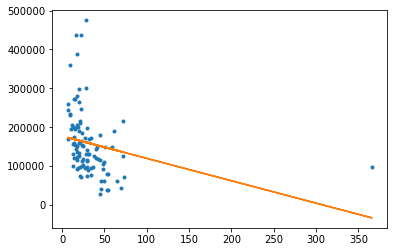

In [11]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(sales['CrimeRate'].values.reshape(-1,1)),'-')

## Remove Center City and redo the analysis

In [12]:
sales_noCC = sales[sales['MilesPhila']!= 0.0]

<AxesSubplot:xlabel='CrimeRate', ylabel='HousePrice'>

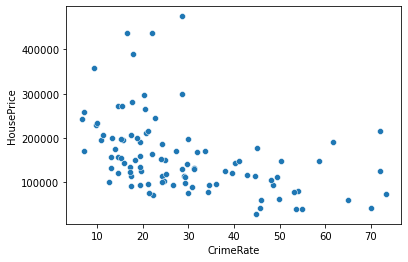

In [13]:
sns.scatterplot(data = sales_noCC , x = 'CrimeRate', y = 'HousePrice')

## Refit Simple Regression Model on this modified dataset

In [14]:
crime_model_noCC = LinearRegression()

In [15]:
X_noCC = sales_noCC['CrimeRate']
y_noCC = sales_noCC['HousePrice']

In [16]:
crime_model_noCC.fit(X_noCC.values.reshape(-1,1),y_noCC) 

LinearRegression()

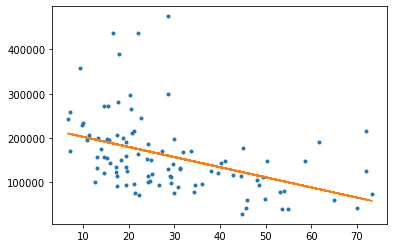

In [17]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
        sales_noCC['CrimeRate'],crime_model_noCC.predict(sales_noCC['CrimeRate'].values.reshape(-1,1)),'-')

## Compare coefficients for full-data fit versus no-CC fit

In [18]:
print('Coefficients: \n', crime_model.coef_)

Coefficients: 
 [-576.90812768]


In [19]:
print('Coefficients: \n', crime_model_noCC.coef_)

Coefficients: 
 [-2288.68942995]


## High leverage points

High Leverage point: an extreme x value where there are not other observations. As a result, recalling the closed-form solution for simple regression, this point has the potential to dramatically change the least squares line since the center of x mass is heavily influenced by this one point and the least squares line will try to fit close to that outlying (in x) point. If a high leverage point follows the trend of the other data, this might not have much effect. On the other hand, if this point somehow differs, it can be strongly influential in the resulting fit.

## Influencial Observations

An influential observation is one where the removal of the point significantly changes the fit. As discussed above, high leverage points are good candidates for being influential observations, but need not be. Other observations that are not leverage points can also be influential observations (e.g., strongly outlying in y even if x is a typical value).

## Remove High-value outlier neighborhoods and redo analysis

In [20]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000]
X_sales_nohighend = sales_nohighend['CrimeRate']
y_sales_nohighend = sales_nohighend['HousePrice']
crime_model_nohighend = LinearRegression()
crime_model_nohighend.fit(X_sales_nohighend.values.reshape(-1,1), y_sales_nohighend)

LinearRegression()

In [21]:
print('Coefficients: \n', crime_model_nohighend.coef_)

Coefficients: 
 [-1838.56264859]


## Compare two models

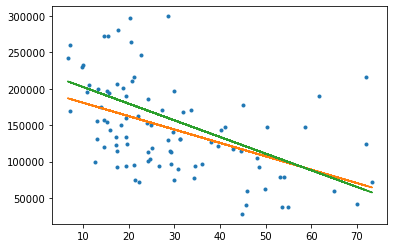

In [22]:
plt.plot(sales_nohighend['CrimeRate'], sales_nohighend['HousePrice'], '.',
         sales_nohighend['CrimeRate'], crime_model_nohighend.predict(X_sales_nohighend.values.reshape(-1,1)), '-',
         sales_nohighend['CrimeRate'], crime_model_noCC.predict(X_sales_nohighend.values.reshape(-1,1)), '-')   